In [2]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from toolbox_ML import *

In [3]:
data = {"n":[3,None,2],"i":[3,2,4],"o":[6,7,8]}
df1 = pd.DataFrame(data,index=["x","y","z"])
df1

,n,i,o
x,3.0,3,6
y,NaN,2,7
z,2.0,4,8


In [4]:
dicc = {}
for i in ["h","u","t","l"]:
    dicc[i] = []
dicc

{'h': [], 'u': [], 't': [], 'l': []}

In [5]:
df = pd.read_csv("./data/titanic.csv")
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [17]:
descripcion = toolbox_ML.describe_df(df)
descripcion


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
DATA_TYPE,int64,int64,object,float64,int64,int64,float64,object,object,object,bool,object,object,object,bool
MISSINGS (%),0.0,0.0,0.0,19.86532,0.0,0.0,0.0,0.224467,0.0,0.0,0.0,77.216611,0.224467,0.0,0.0
VALORES_INFINITOS,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
UNIQUE_VALUES,2,3,2,88,7,7,248,3,3,3,2,7,3,2,2
CARDIN (%),0.002245,0.003367,0.002245,0.098765,0.007856,0.007856,0.278339,0.003367,0.003367,0.003367,0.002245,0.007856,0.003367,0.002245,0.002245


In [8]:
def tipifica_variables(df,umbral_categoria,umbral_continua):
    dicc = {
        "nombre_variable":[],
        "tipo_sugerido":[]
    }
    for i in df.columns:
        val_unicos = df[i].nunique()
        cardinalidad = val_unicos /len(df) * 100
        dicc["nombre_variable"].append(i)
        if val_unicos == 2:
            dicc["tipo_sugerido"].append("Binario")
        elif cardinalidad < umbral_categoria:
            dicc["tipo_sugerido"].append("Categorica")
        elif cardinalidad < umbral_continua:
            dicc["tipo_sugerido"].append("Nª Discreta")  
        else:
            dicc["tipo_sugerido"].append("Nª Continua")
    return pd.DataFrame(dicc)

In [9]:
tipifica= toolbox_ML.tipifica_variables(df,10,20)
tipifica

,nombre_variable,tipo_sugerido
0,survived,Binaria
1,pclass,Categórica
2,sex,Binaria
3,age,Numerica Discreta
4,sibsp,Categórica
5,parch,Categórica
6,fare,Numerica Discreta
7,embarked,Categórica
8,class,Categórica
9,who,Categórica


In [10]:
isinstance(df["survived"].dtype,np.number)

False

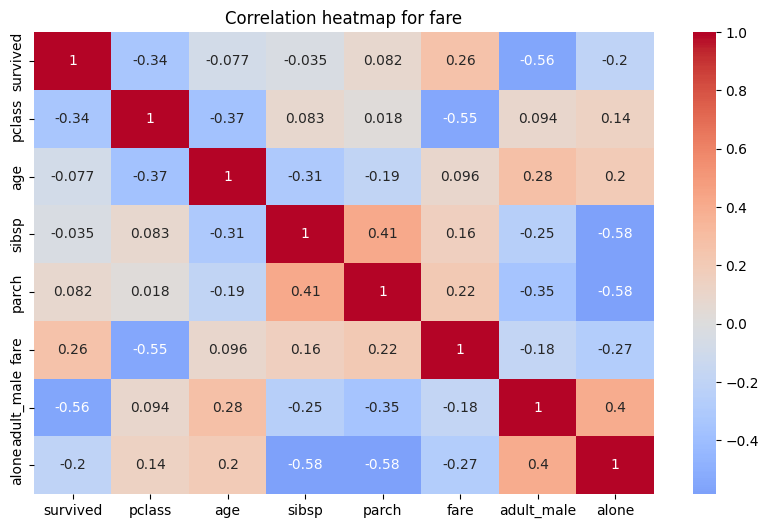

['survived', 'pclass', 'parch', 'alone']


In [11]:
features = toolbox_ML.get_features_num_regression(df,target_col="fare",umbral_corr=0.2,pvalue=0.05,mostrar=True)
print(features)

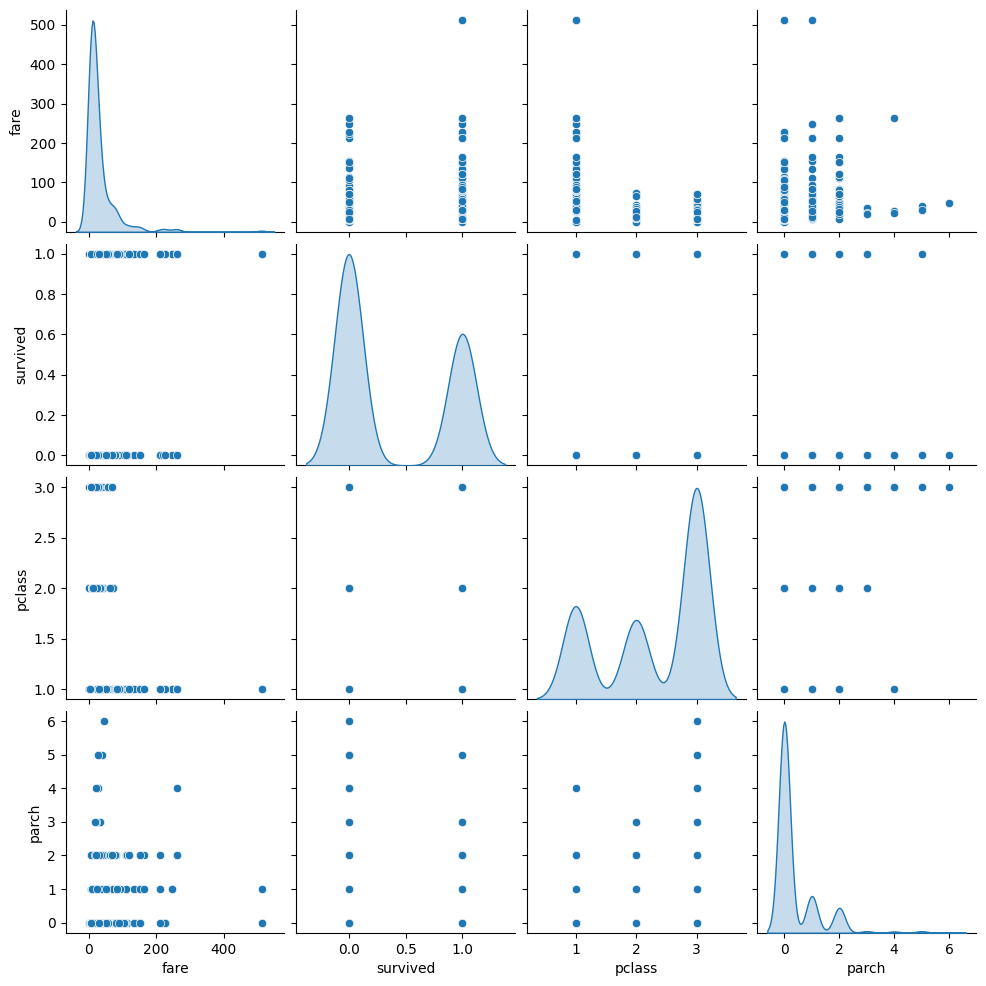

['survived', 'pclass', 'parch']

In [12]:
plot_num = toolbox_ML.plot_features_num_regression(df,target_col="fare",umbral_corr=0.2,pvalue=0.05)
plot_num

In [25]:
get_features_cat = toolbox_ML.get_features_cat_regression(df, target_col="fare")
get_features_cat

['sex', 'embarked', 'class', 'who', 'deck', 'embark_town', 'alive']

In [29]:
plot_cat_reg = toolbox_ML.plot_features_cat_regression (df, target_col= "fare")
plot_cat_reg

['sex', 'embarked', 'class', 'who', 'deck', 'embark_town', 'alive']

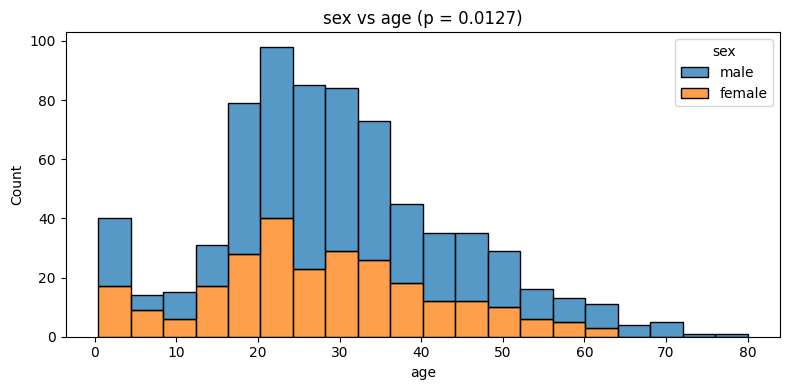

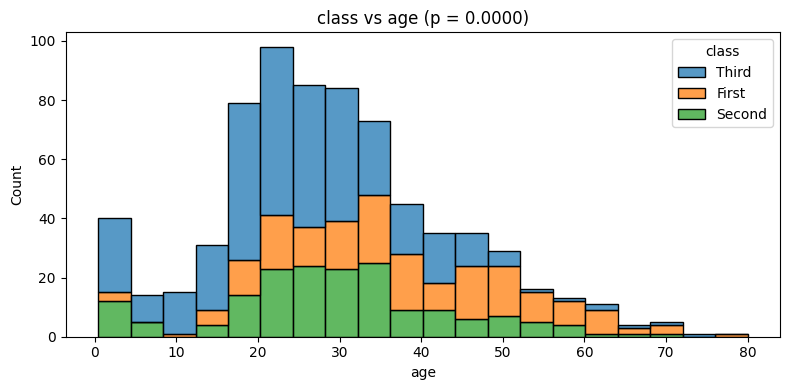

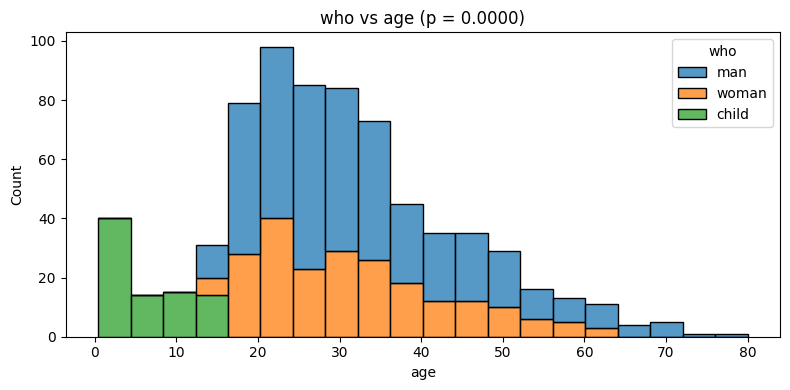

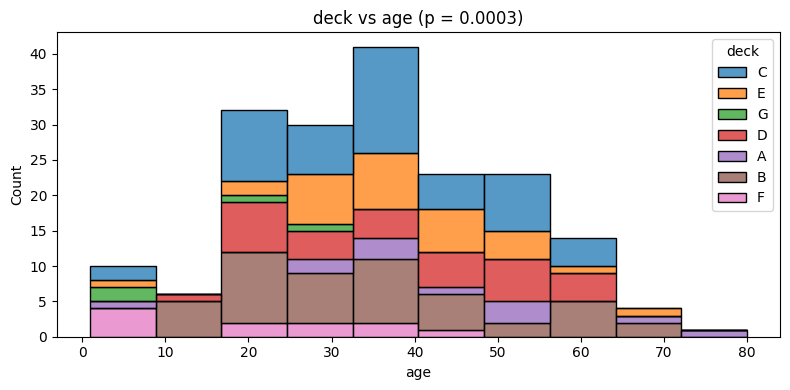

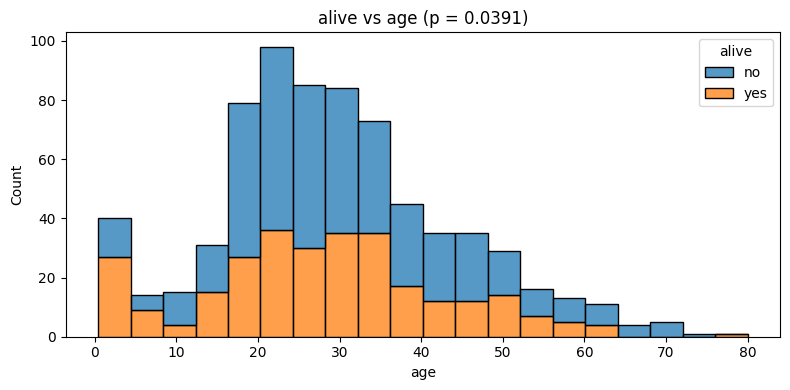

📊 Variables categóricas relacionadas con 'age': ['sex', 'class', 'who', 'deck', 'alive']


In [34]:
target_col = "age"  
pvalue = 0.05  # Nivel de significación
with_individual_plot = True  # Activa los gráficos
df_filtered = df[df["pclass"].map(df["pclass"].value_counts()) > 5]  # Elimina categorías con menos de 5 valores

# Llamamos a la función
cols_significativas = toolbox_ML.plot_features_cat_regression(df_filtered, target_col, pvalue=pvalue, with_individual_plot=with_individual_plot)

# Mostramos las variables relacionadas
print(f"📊 Variables categóricas relacionadas con '{target_col}': {cols_significativas}")
